# 長期・中期・短期の株価チャート

## 分析環境の構築

In [1]:
import pandas as pd
import mplfinance as mpf
import yfinance as yf
import pandas_ta as ta
from datetime import date, datetime, timedelta
# yfinanceのdownloadでのfuture warningを消す
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## データ取得とチャート表示関数

In [2]:
def chart_check(ticker, dttype='d'):
    # パラメータ設定
    if dttype=='m':
        dtdays=4000; dtterm='1mo'; sma=6; lma=12; stitle='MONTHLY'
    elif dttype=='w':
        dtdays=900; dtterm='1wk'; sma=13; lma=26; stitle='WEEKLY'
    else:
        dtdays=180; dtterm='1d'; sma=5; lma=25; stitle='DAILY'
    # yahooサイトからデータをダウンロード
    end = datetime.today()
    start = end - timedelta(days=dtdays)
    # 新しくインストールしたyfinanceの場合
    df = yf.download(ticker, start, end, interval=dtterm)
    df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]
    # 古いyfinanceの場合
    #yf.pdr_override()
    #df = pdr.get_data_yahoo(ticker, start, end, interval=dtterm)
    # 指標値の計算
    df['RSI'] = ta.rsi(df['Close'], length=14)
    df.ta.bbands(close='Close', length=20, std=2, append=True)
    # mplfinanceのmake_addplotメソッドを用いてチャートに付け加えるプロットを作成する
    idx_plot = [
            mpf.make_addplot((df['RSI']), panel=2, ylabel='RSI', secondary_y=False),
            mpf.make_addplot((df['BBU_20_2.0']), panel=3, ylabel='Bollinger', secondary_y=False),
            mpf.make_addplot((df['Close']), panel=3, secondary_y=False),
            mpf.make_addplot((df['BBL_20_2.0']), panel=3, secondary_y=False),
    ]
    # 表題と凡例
    ch_title = stitle+" STOCK PRICE CHART FOR {0}".format(ticker)
    line_titles1 = ['RSI']
    line_titles2 = ['Upper','Close','Lower']
    # チャート描画
    fig, axes = mpf.plot(df,type='candle',figsize =(16,8), style='yahoo',
             addplot=idx_plot,volume=True,mav=(sma,lma), returnfig=True)
    # 表題と凡例の指定
    axes[0].set_title(ch_title)
    axes[4].legend(line_titles1)
    axes[6].legend(line_titles2)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
C:\Users\nicjp\anaconda3\Lib\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)
[*********************100%***********************]  1 of 1 completed
C:\Users\nicjp\anaconda3\Lib\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)
[*********************100%***********************]  1 of 1 completed
C:\Users\nicjp\anaconda3\Lib\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


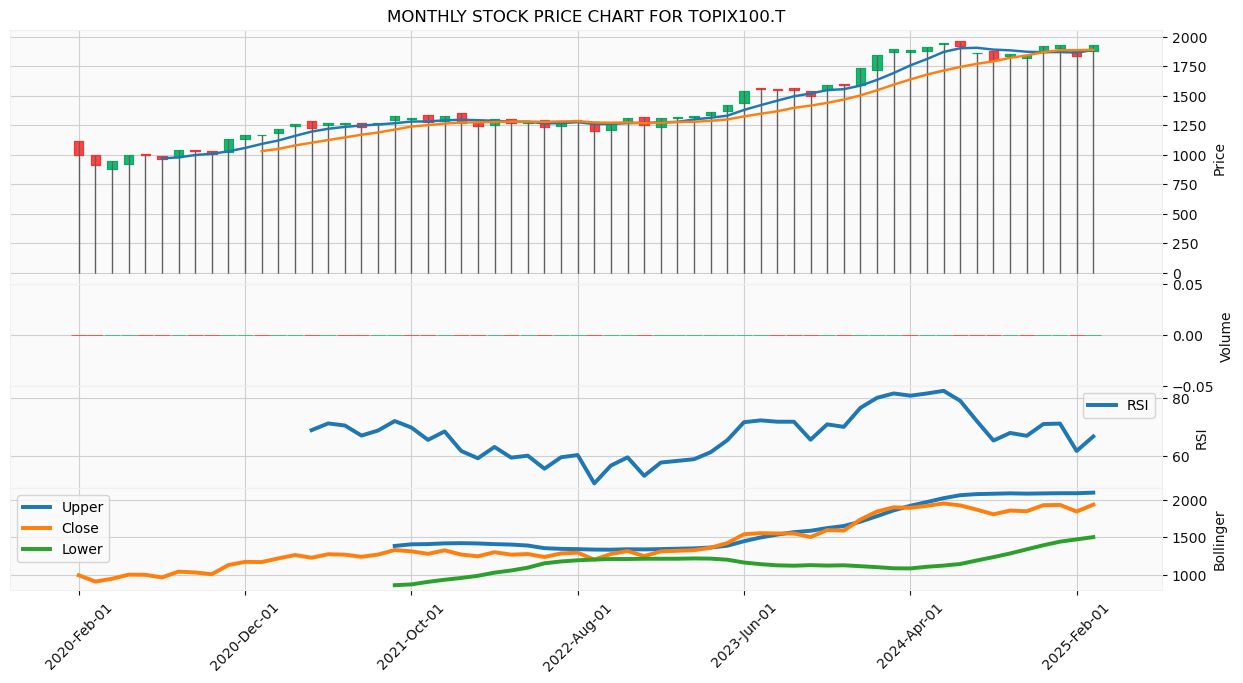

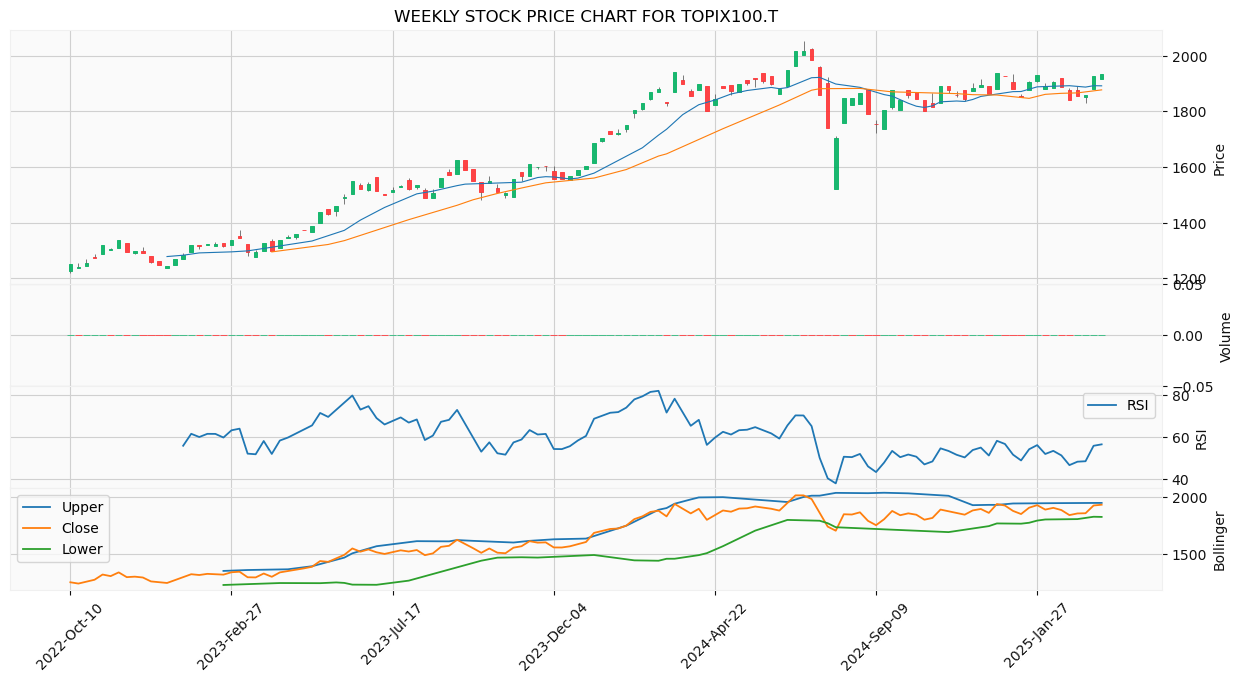

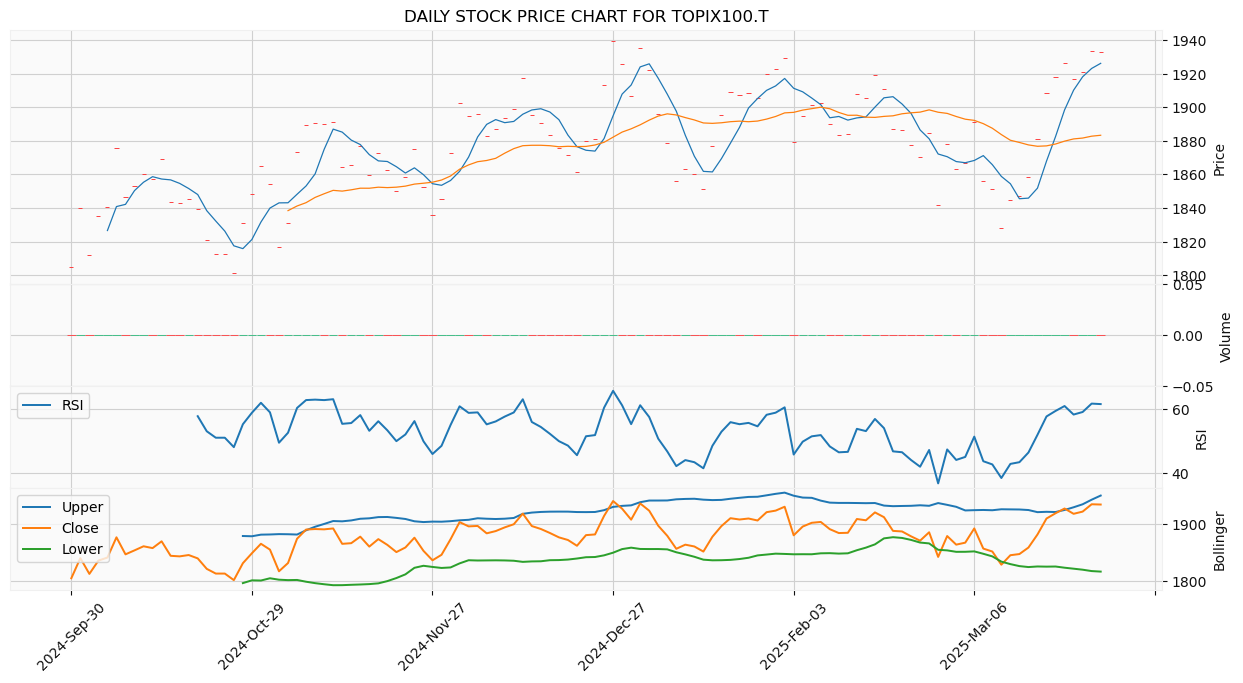

In [3]:
ticker = 'TOPIX100.T'
chart_check(ticker, dttype='m')  # 月足チャート
chart_check(ticker, dttype='w')  # 週足チャート
chart_check(ticker, dttype='d')  # 日足チャート